# PCA of different Panels * Datasets

In [1]:
%%time
%load_ext autoreload
%autoreload 2

%matplotlib inline

from components.panel import Panel
from components.dataset import Dataset


import matplotlib.pyplot as plt
import seaborn as sns

from pca.pca_generator import PCAGenerator
from pca.pca_plotter import PCAPlotter


pca_generator = PCAGenerator()
pca_plotter = PCAPlotter()

CPU times: user 640 ms, sys: 56 ms, total: 696 ms
Wall time: 704 ms


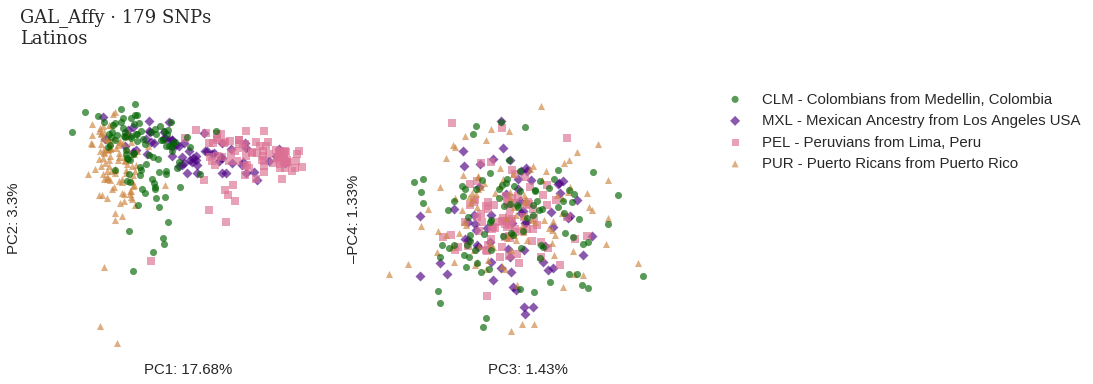

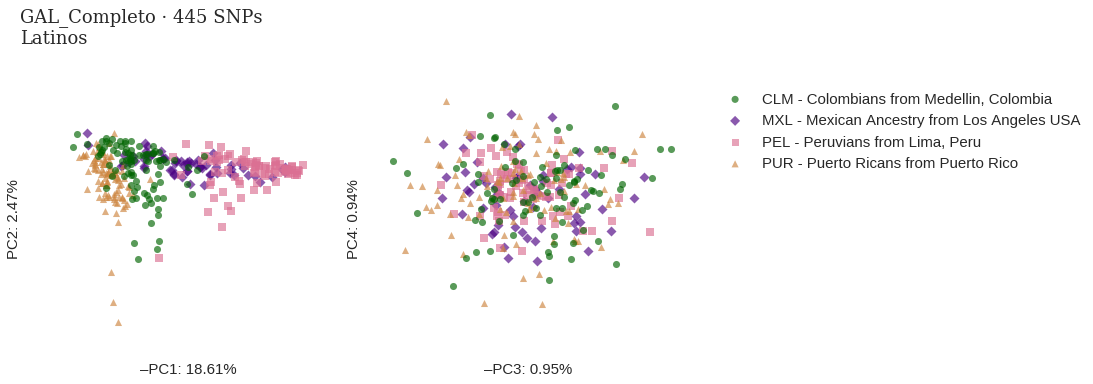

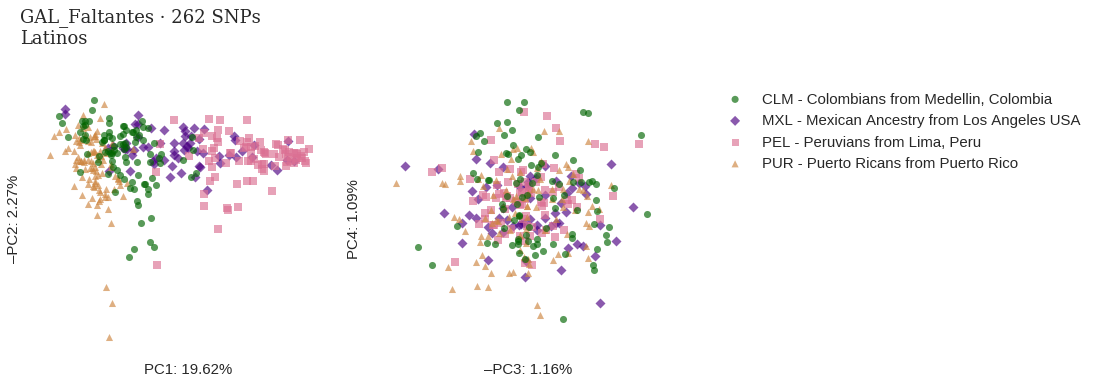

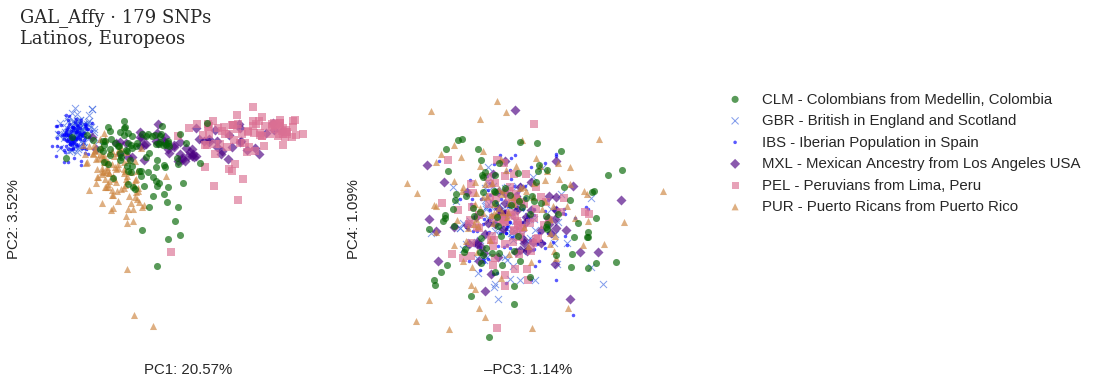

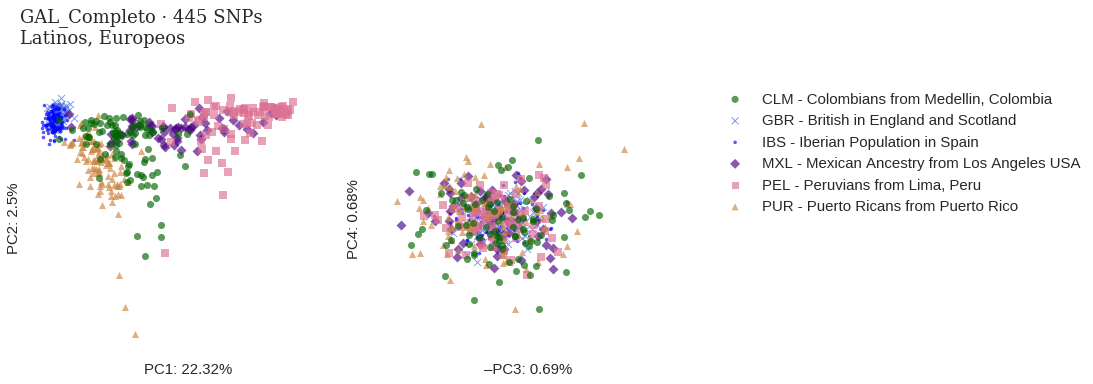

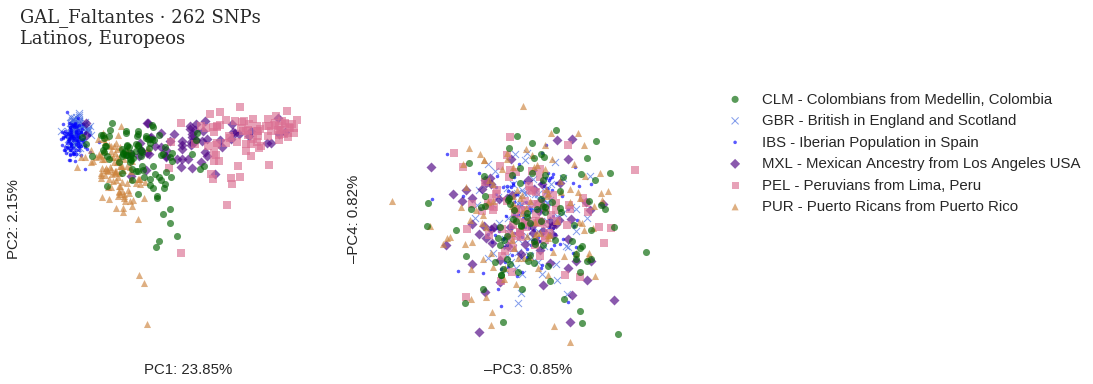

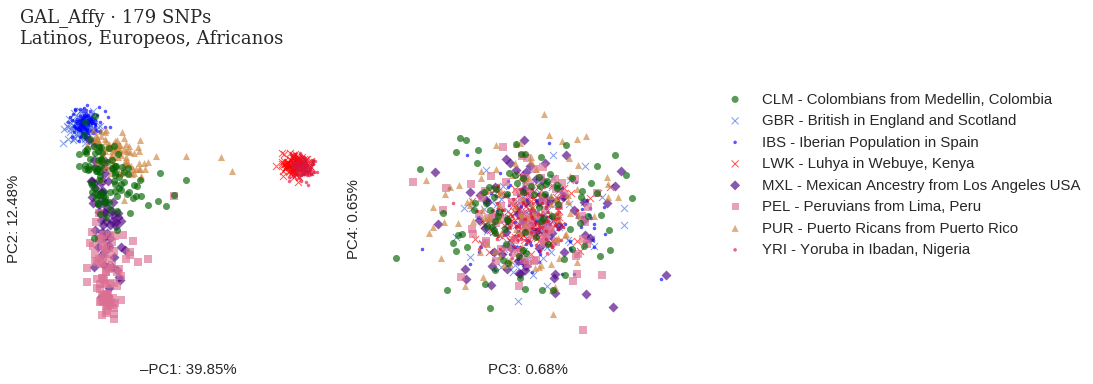

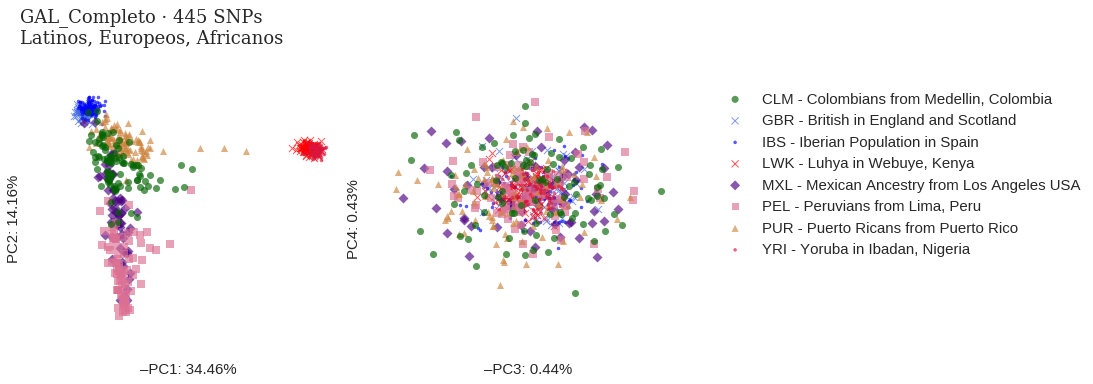

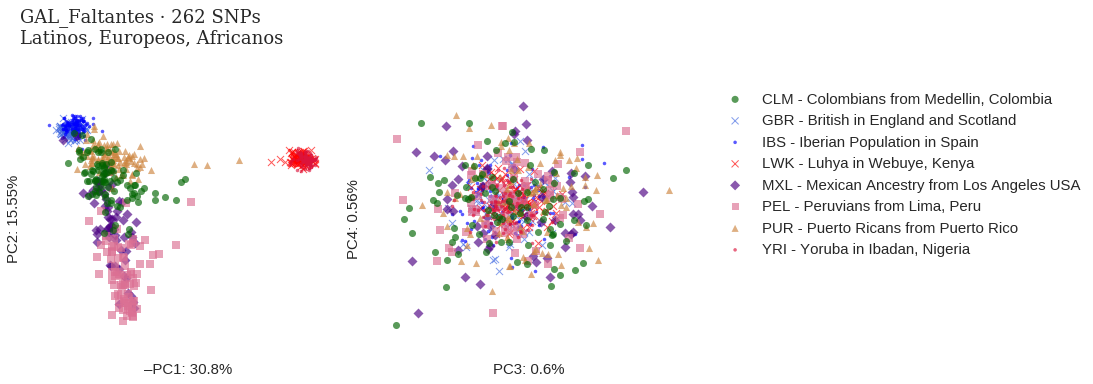

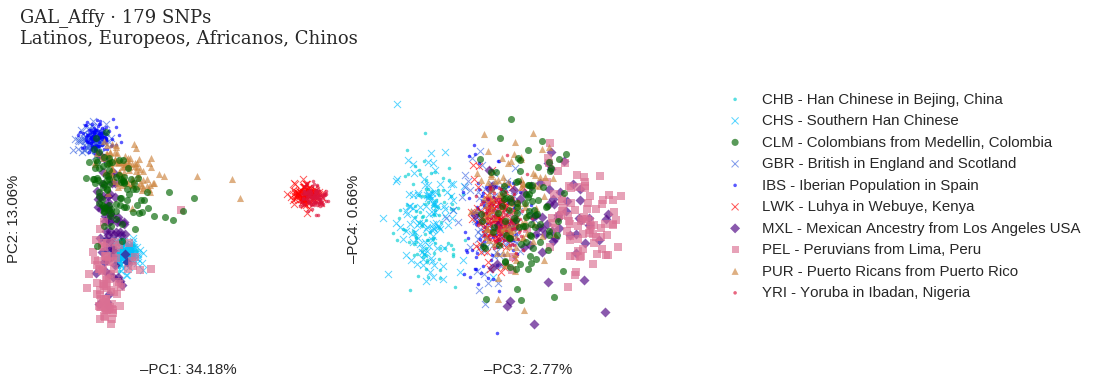

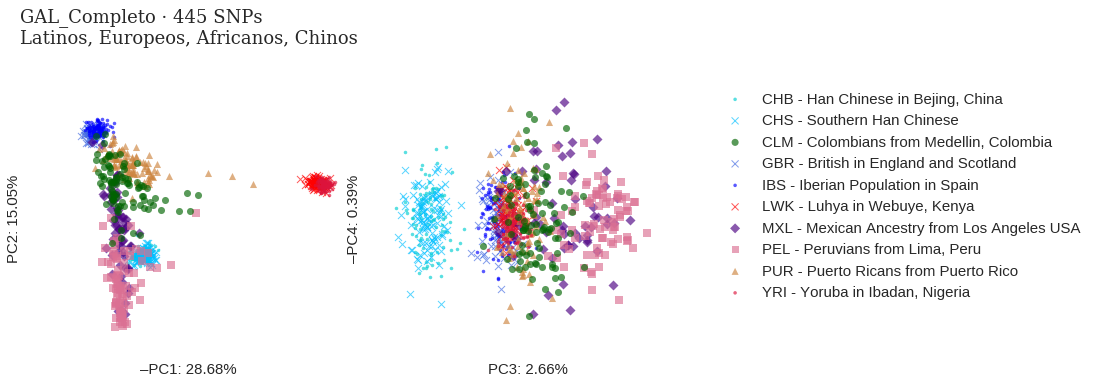

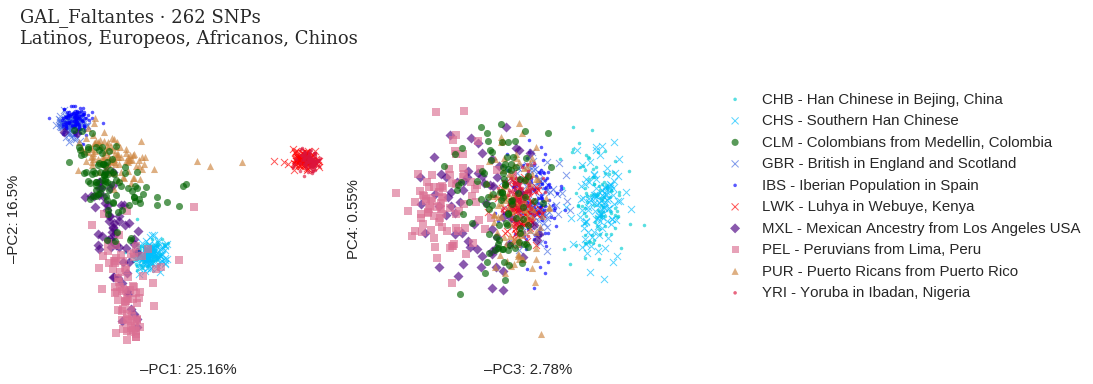

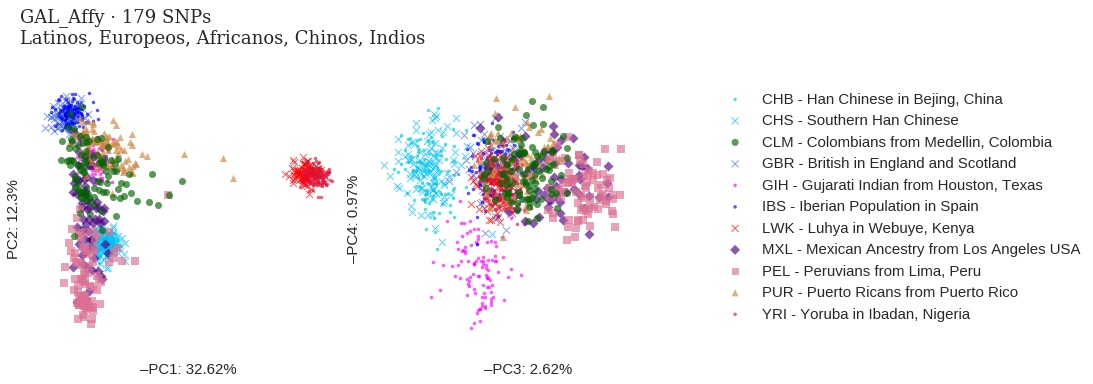

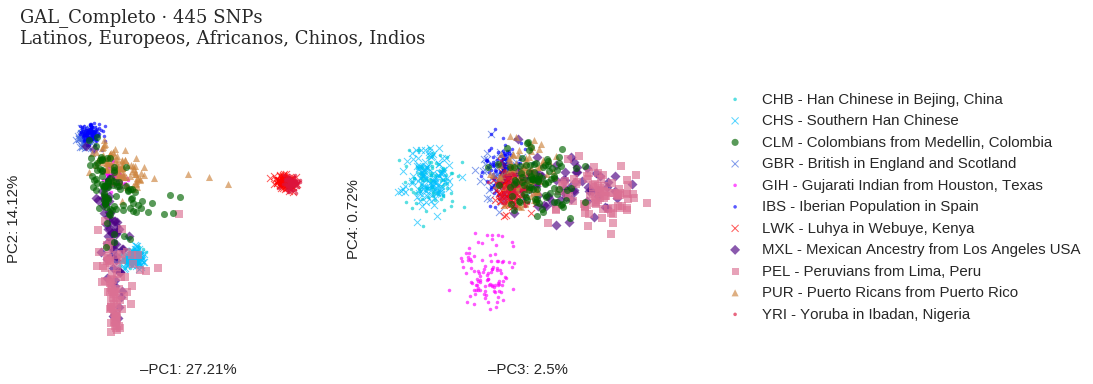

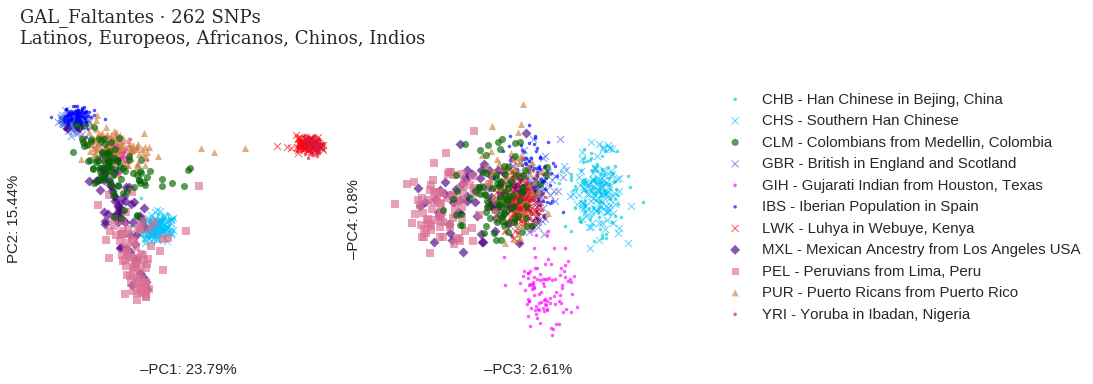

/home/juan/repos/tesina/pca/pca_generator.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  genotypes.dropna(axis=1, inplace=True)


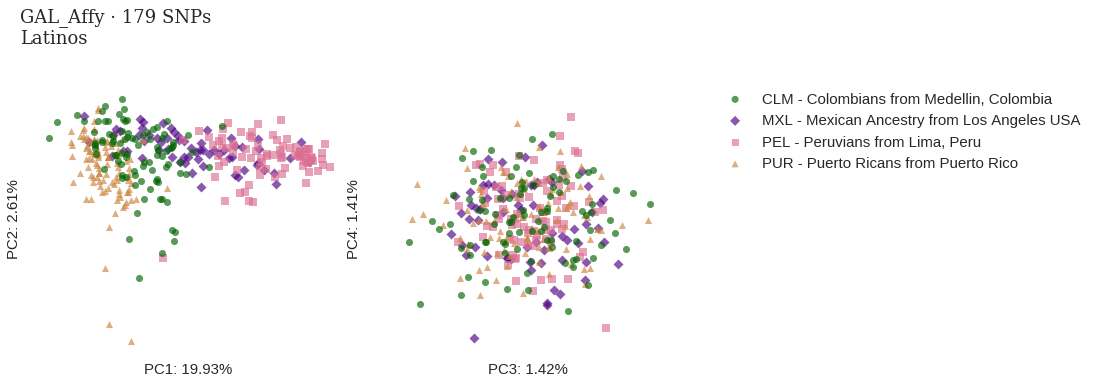

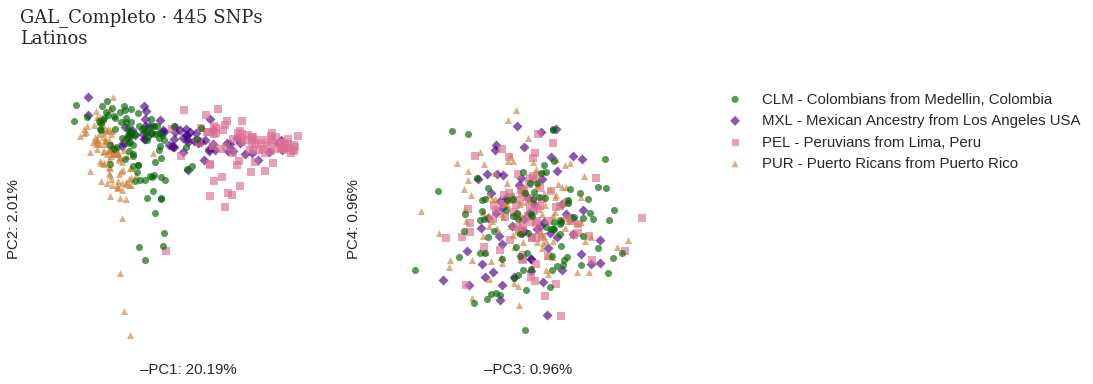

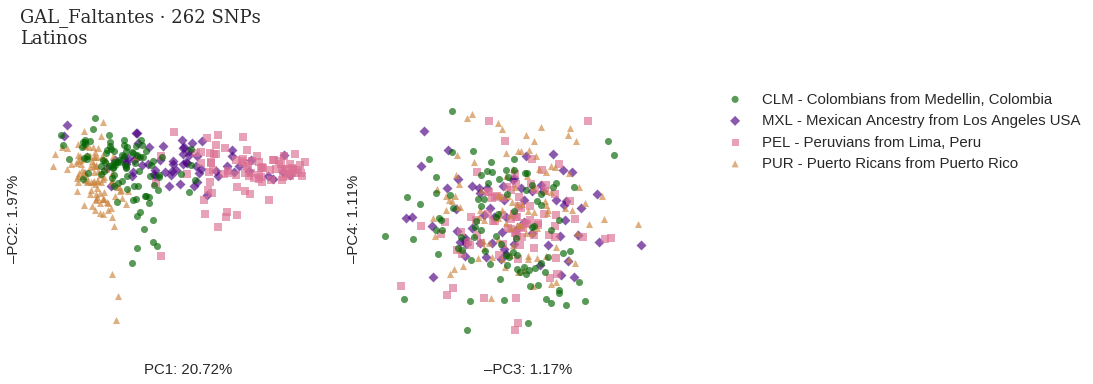

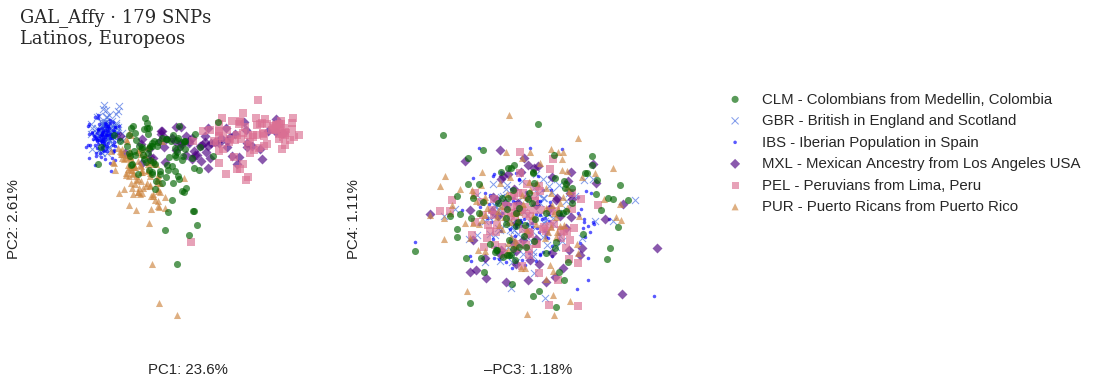

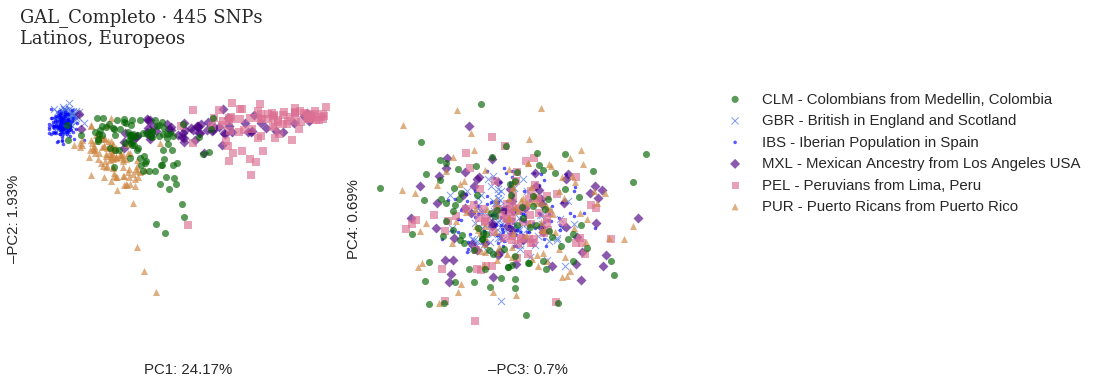

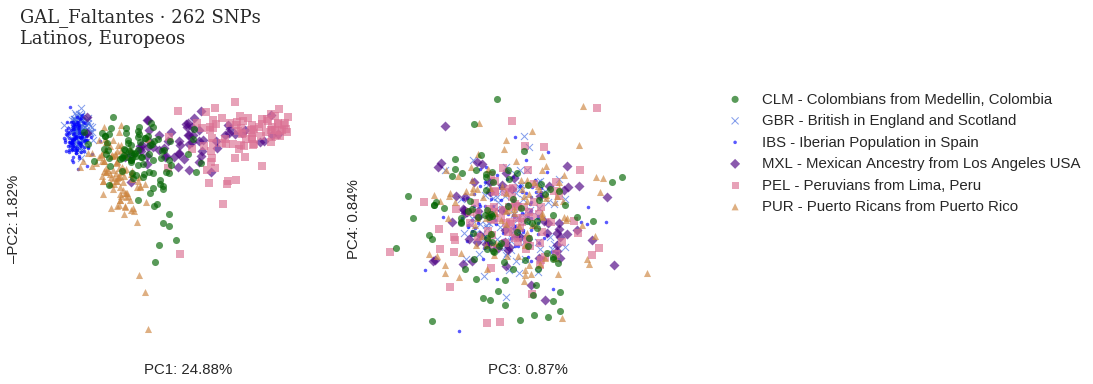

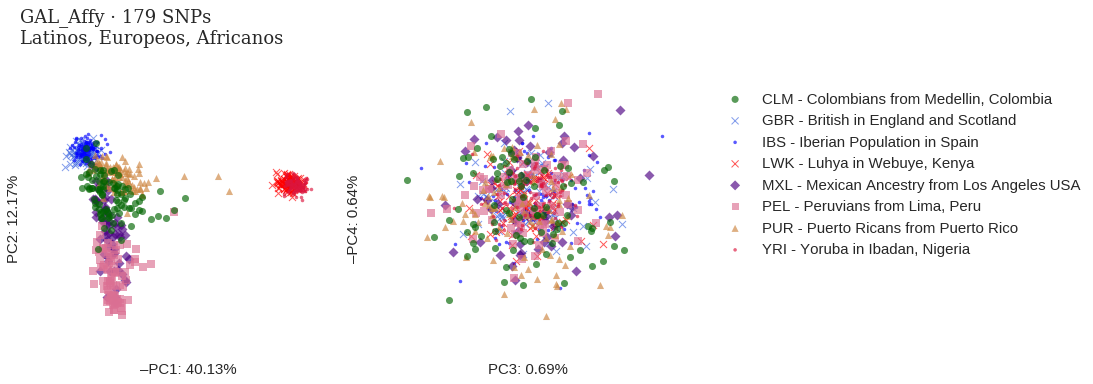

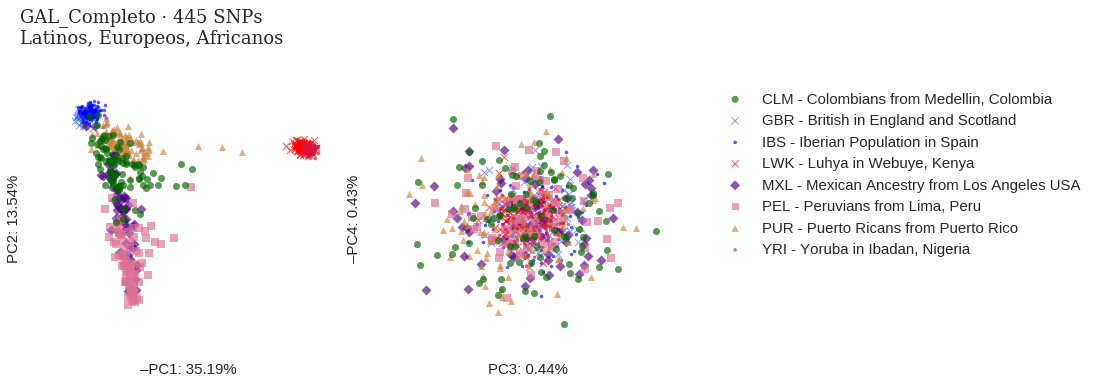

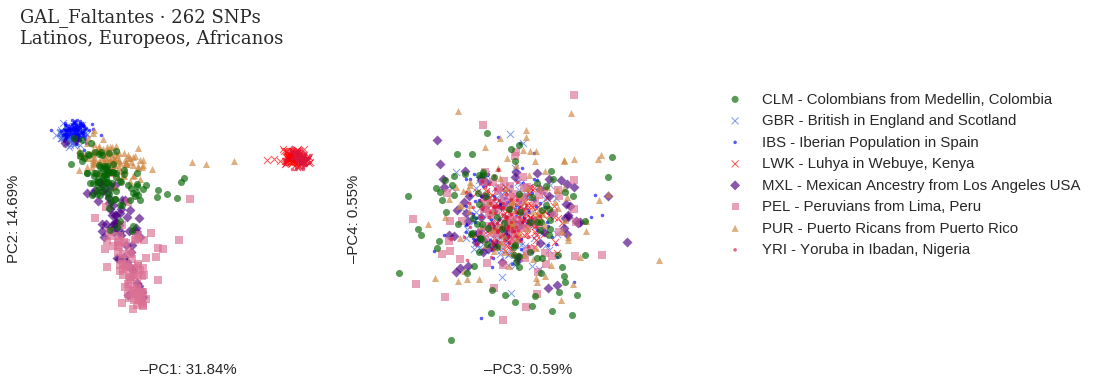

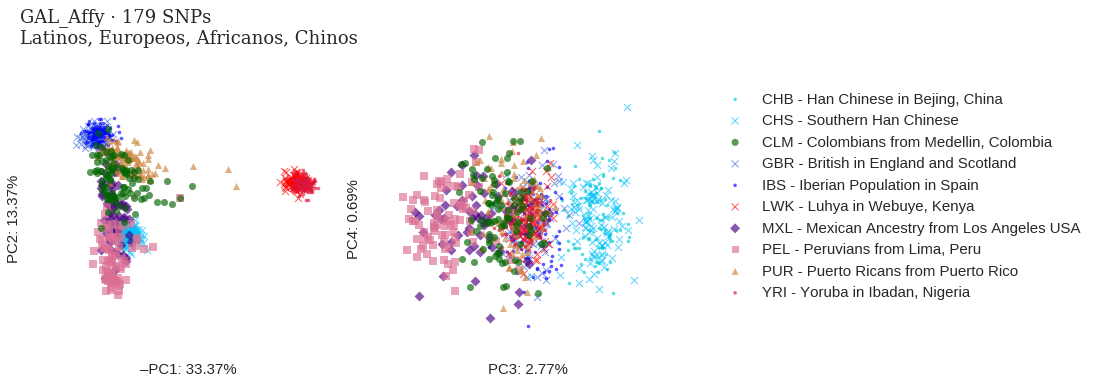

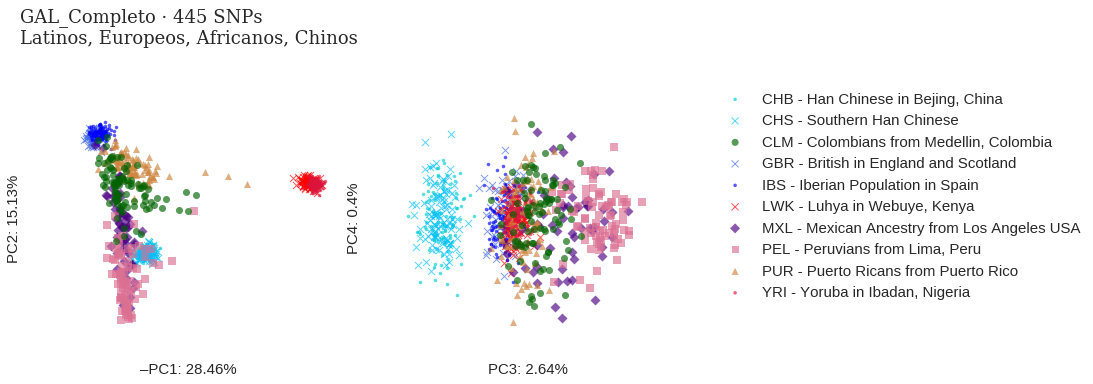

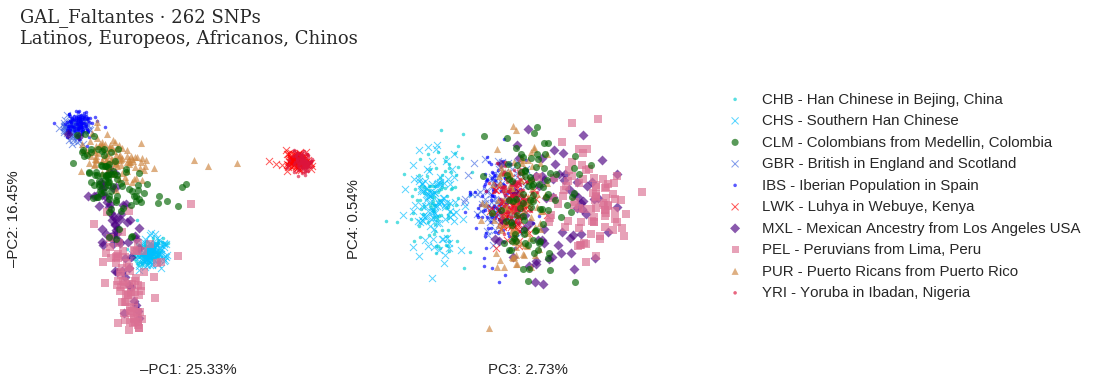

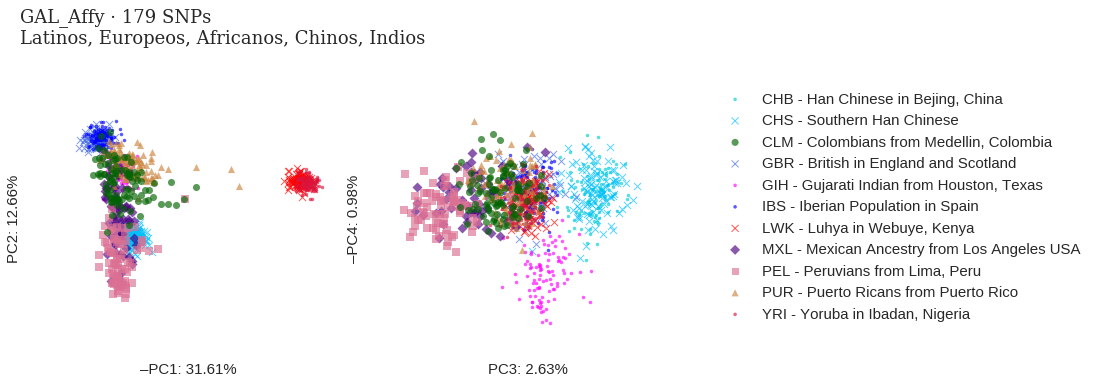

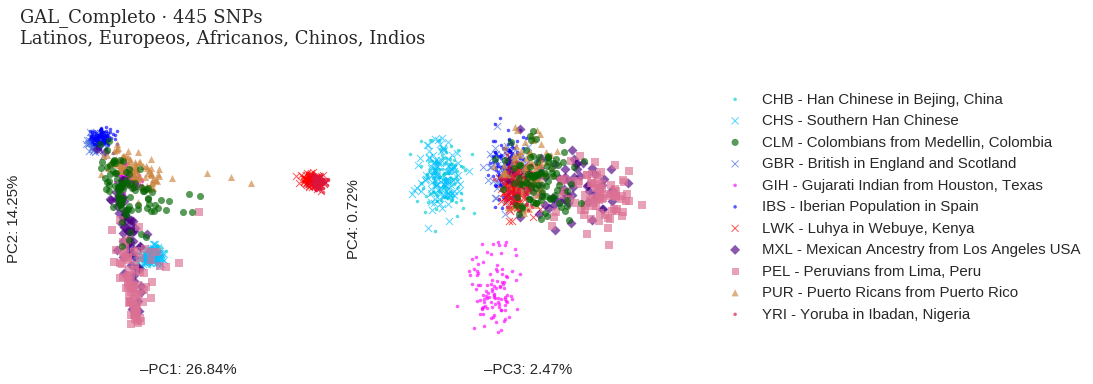

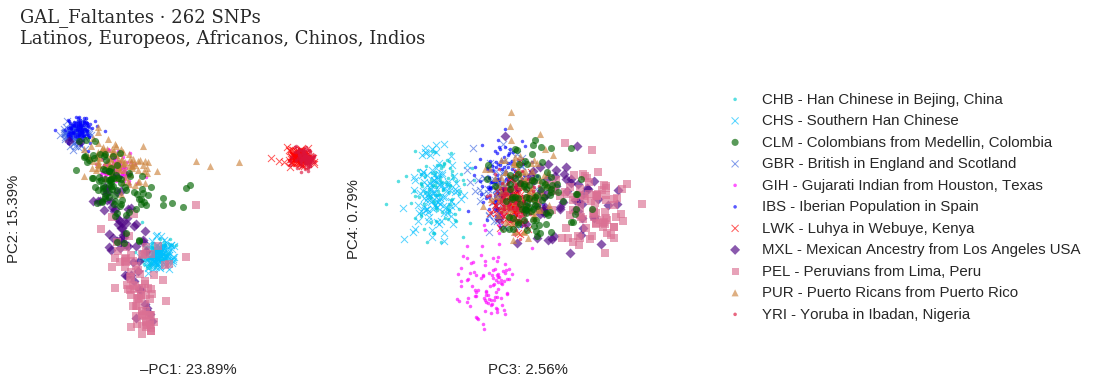

In [6]:
sns.set_context("notebook")
sns.set_style("white")


def make_filename(dataset_label, panel_label, components_to_compare):
    return "{}__{}__PCx{}".format(dataset_label, panel_label,
                                  len(components_to_compare) * 2)


for normalize in [True, False]:

    for dataset in Dataset.all_datasets():

        for panel in Panel.all_panels():
            components = [("PC1", "PC2"), ("PC3", "PC4")]         
            if panel.label == "CPx100":
                components += [("PC5", "PC6"), ("PC7", "PC8"), ("PC9", "PC10")]

            title = "{}\n{}".format(panel.name, dataset.name)
            filename = make_filename(dataset.label, panel.label, components)
            genotypes = panel.genotypes_1000G(dataset=dataset)

            if normalize:
                filename += "_normalized"

            pca_df, explained_var = pca_generator.run(genotypes, normalize=normalize)
            pca_plotter.plot(pca_df, explained_var, title, filename, components)
            plt.show()

## Generate subpanels from GAL_Affy to check the dispersion of the clusters

In [7]:
from shutil import copy2
from glob import glob
from os.path import expanduser, join, basename
from subprocess import call
    
from components.panel import Panel


# Choose the desired snp counts of the subpanels and the source panel
panel = Panel("GAL_Affy")
subpanel_lengths = [100, 50, 25, 12, 6]
PANELS_DIR = expanduser("~/tesina/1000Genomes/all_panels")

for length in subpanel_lengths:
    panel.generate_subset_SNP_list(length)
    # ^ Generates .snps files in ~/tesina/panel_info_files

subpanel_files = glob(expanduser("~/tesina/panel_info_files/*_from_*.snps"))
# ^ _from_ is in the generated subpanel filenames

# Use plink to generate the .bed files for the new subpanel
for fpath in subpanel_files:
    label = basename(fpath).replace(".snps", "")
    command = ["plink", "--bfile", join(PANELS_DIR, panel.label),
               "--extract", fpath, "--make-bed", "--out", join(PANELS_DIR, label)]
    call(command)

YOU HAVE TO RUN BOTH THESE SCRIPTS NOW BEFORE YOU CAN PLOT THE PCAs

`~/tesina/1000Genomes/all_panels/1_create_traw_for_each_bed.sh`
`~/tesina/1000Genomes/all_panels/2_make_traw_pandas_friendly.sh`

## Plot the subpanels PCA results

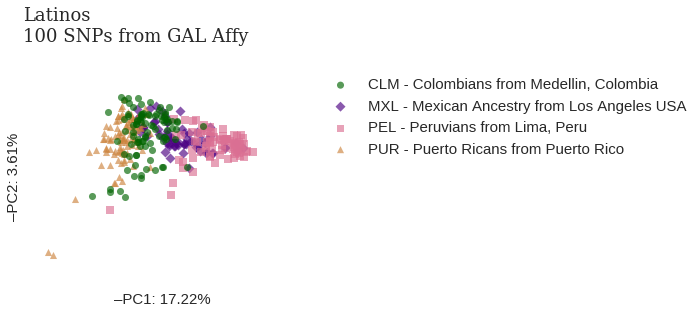

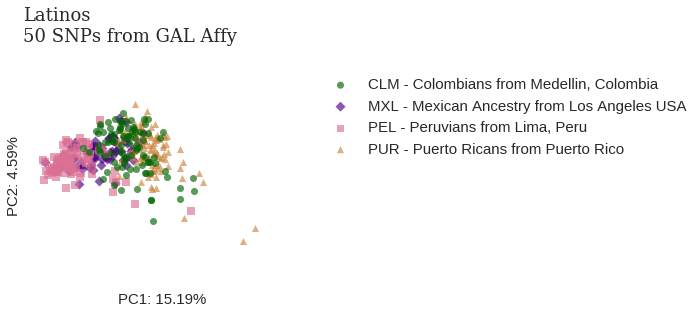

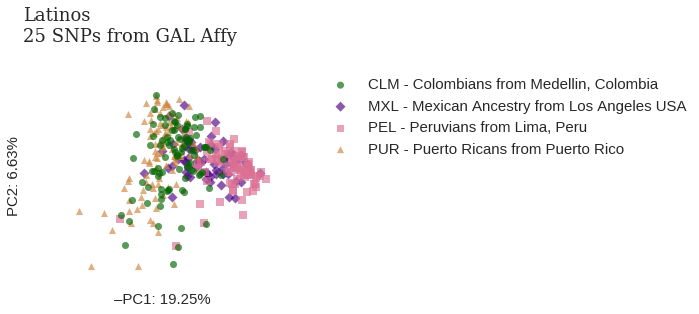

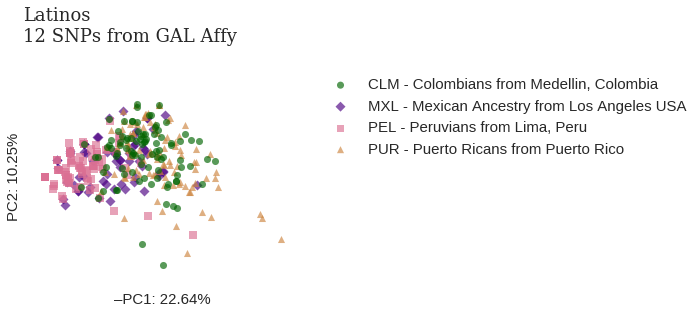

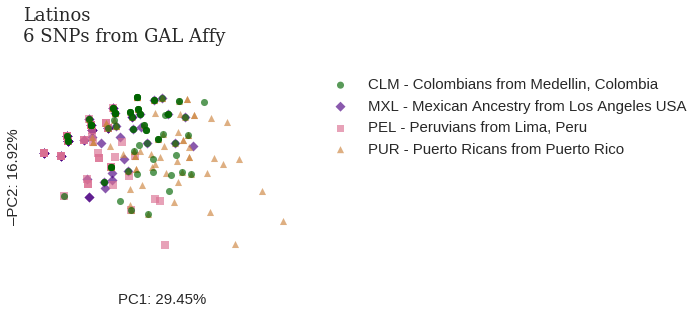

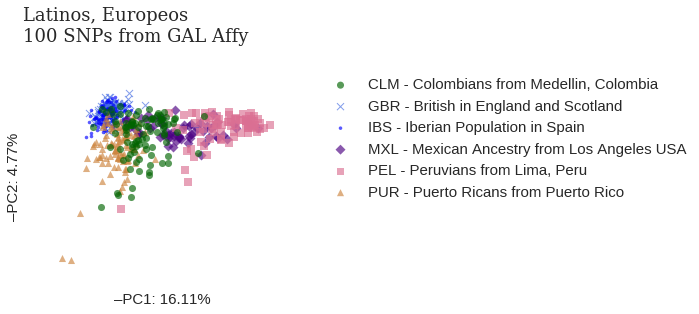

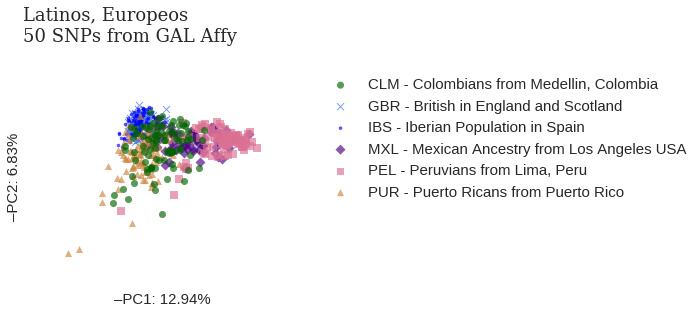

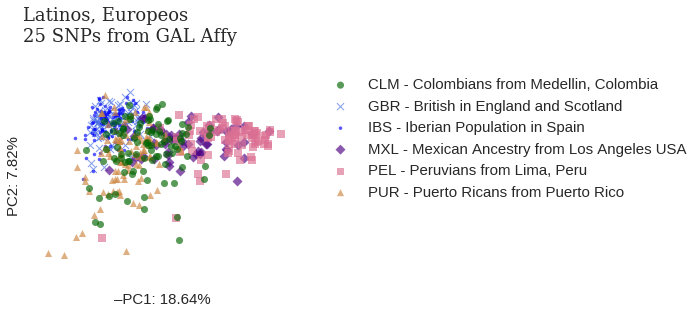

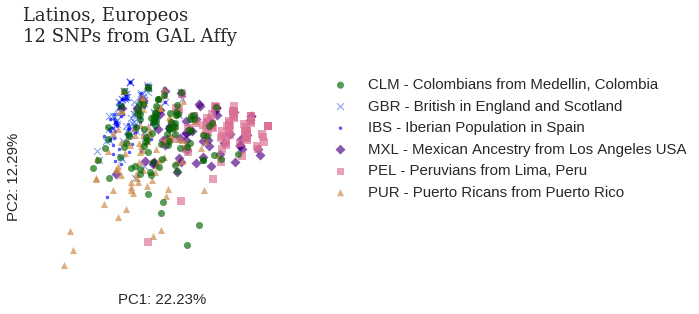

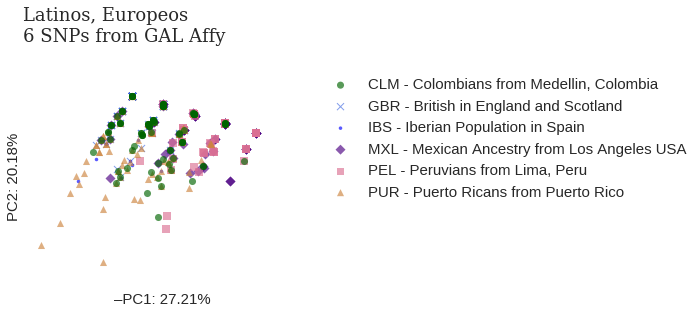

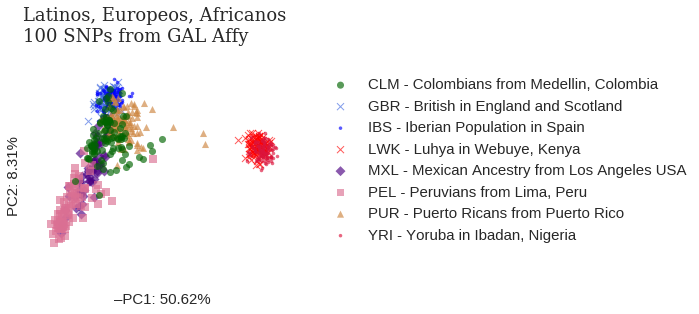

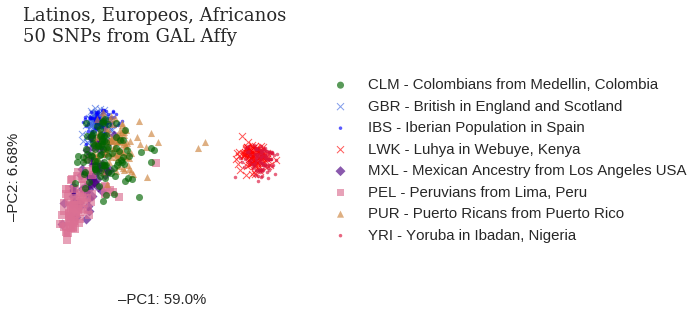

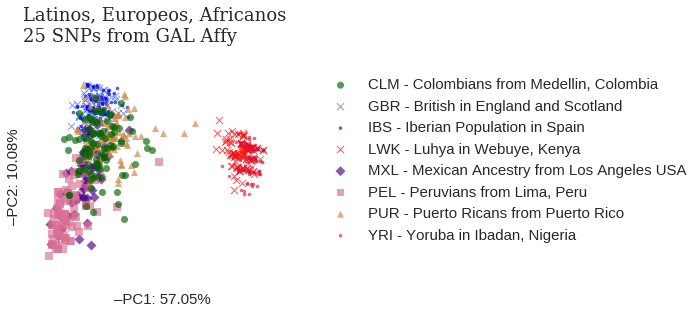

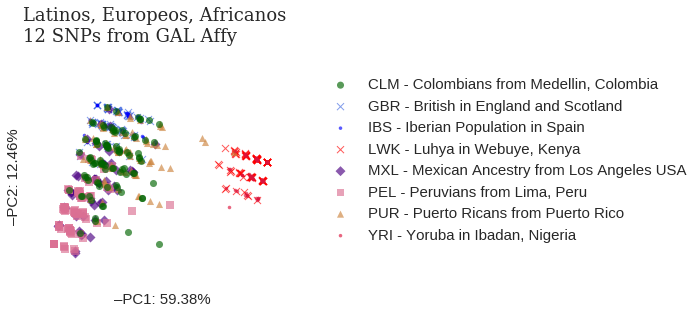

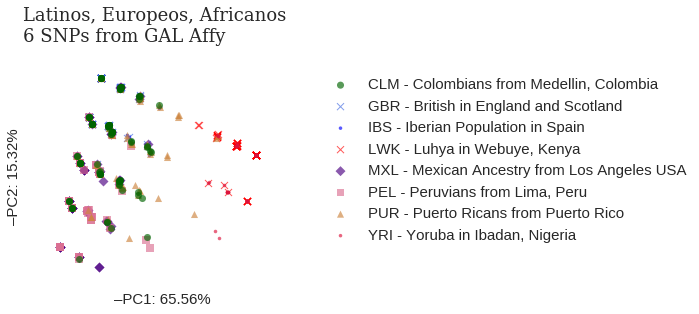

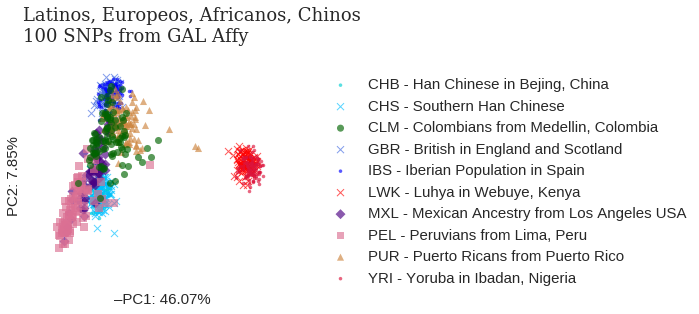

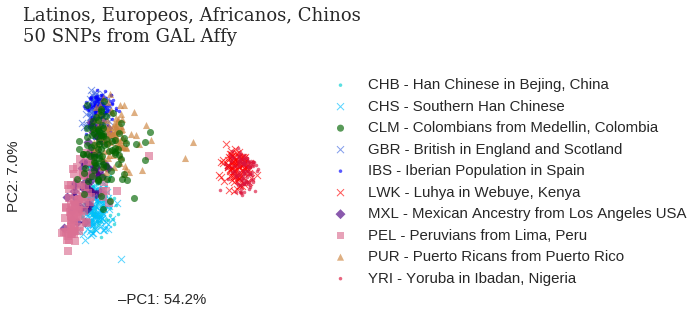

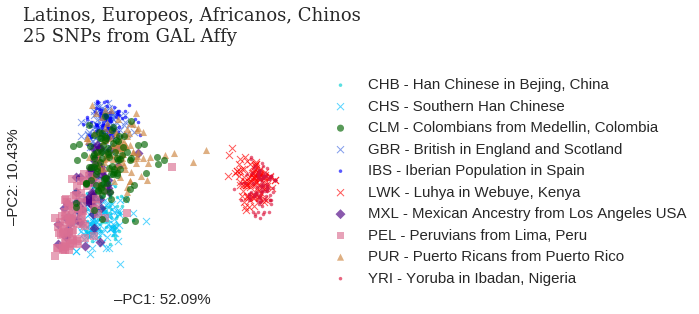

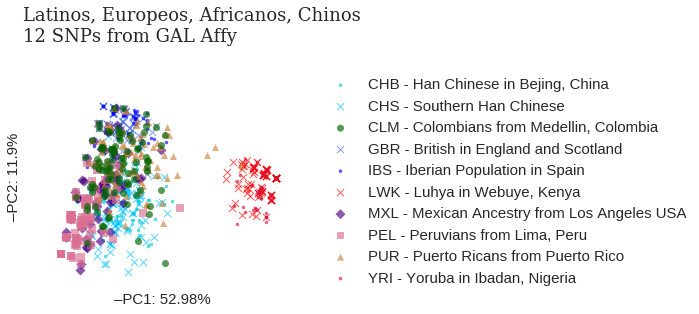

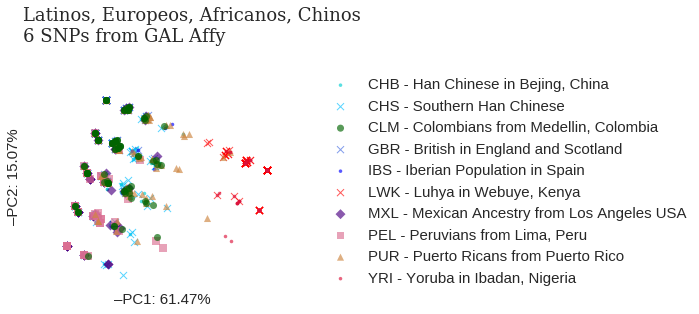

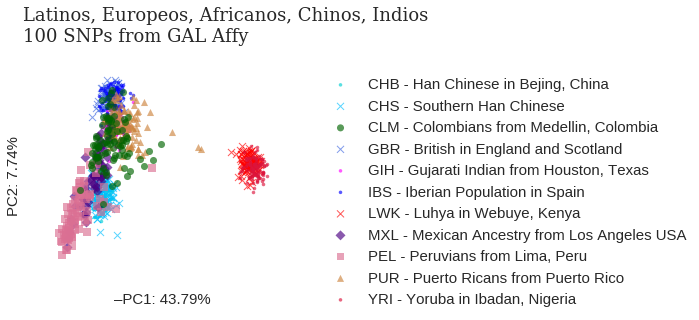

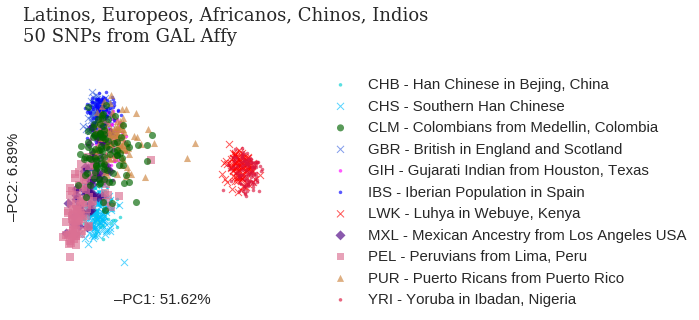

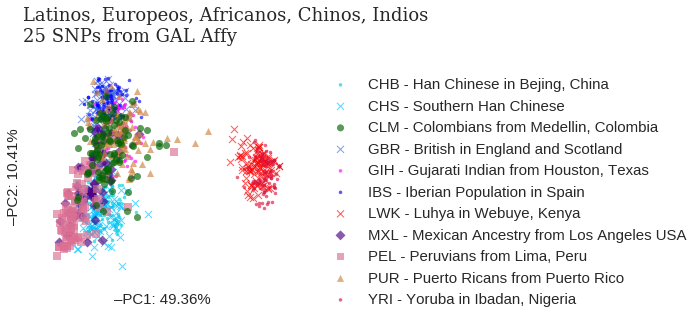

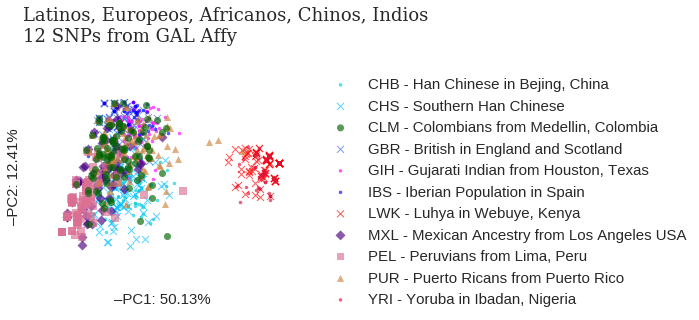

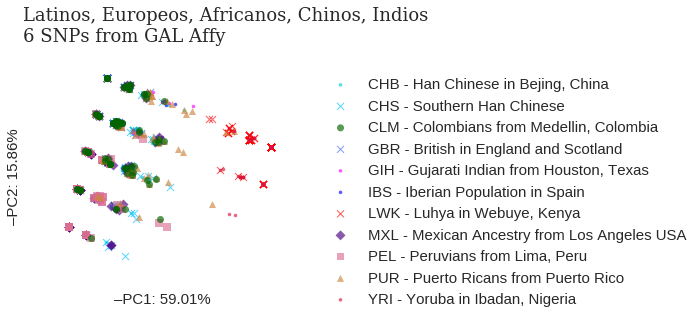

/home/juan/repos/tesina/pca/pca_generator.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  genotypes.dropna(axis=1, inplace=True)


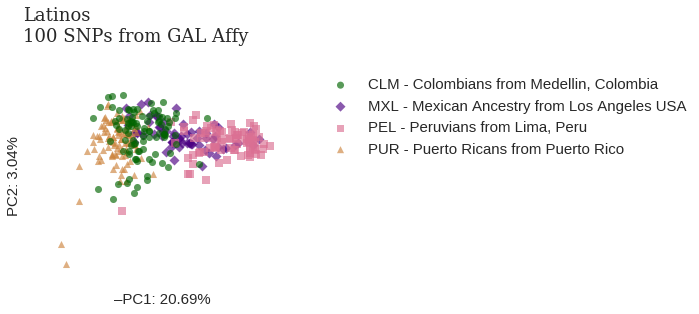

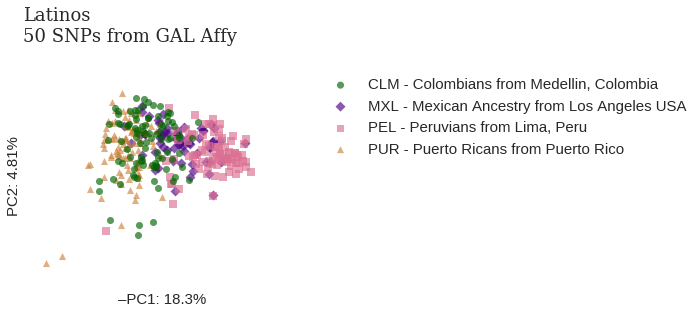

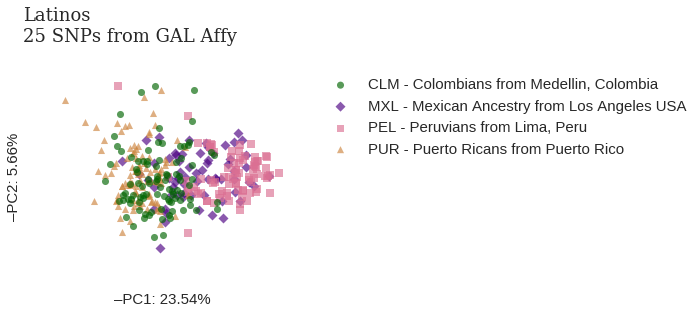

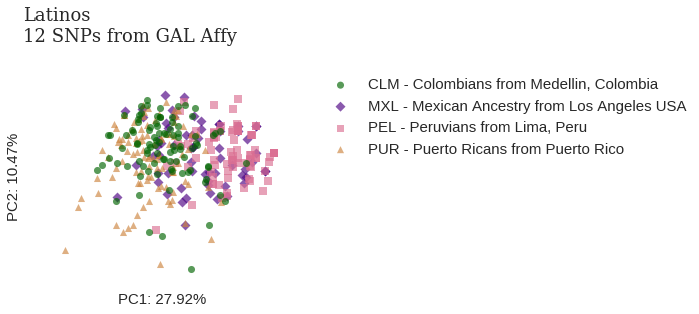

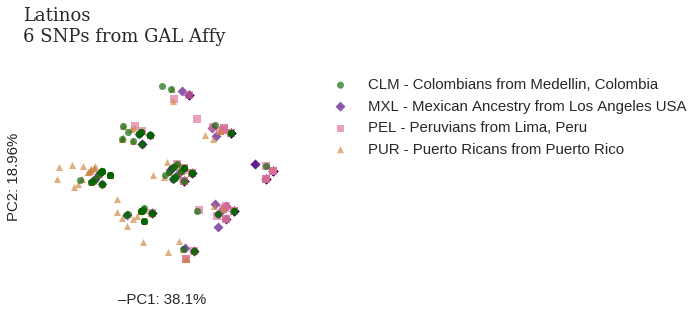

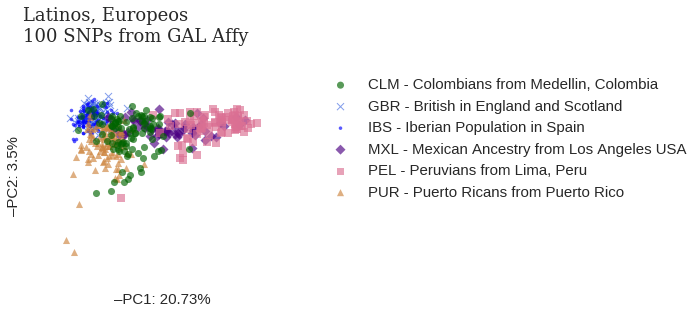

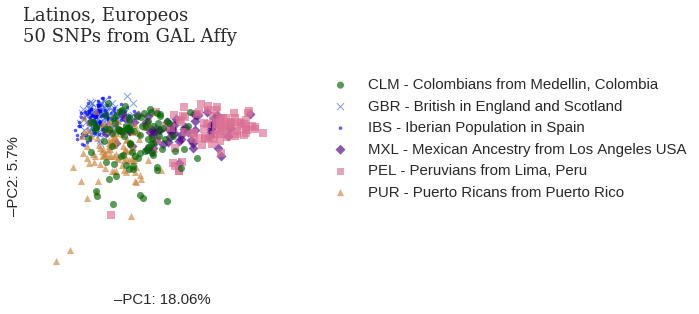

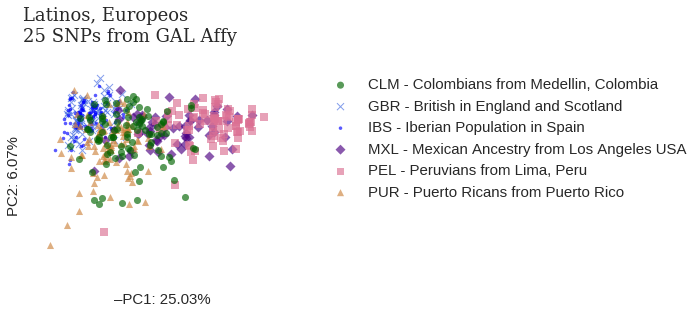

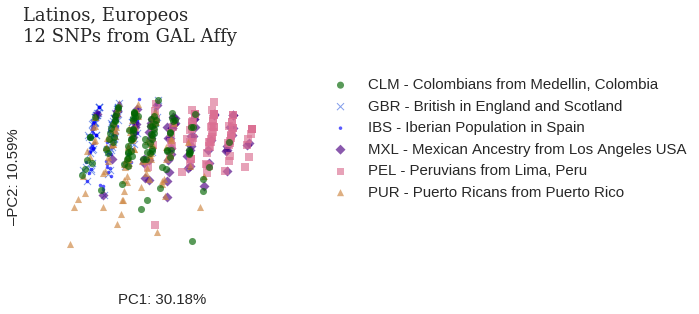

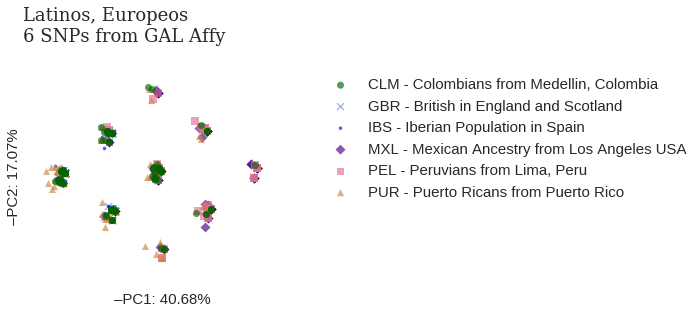

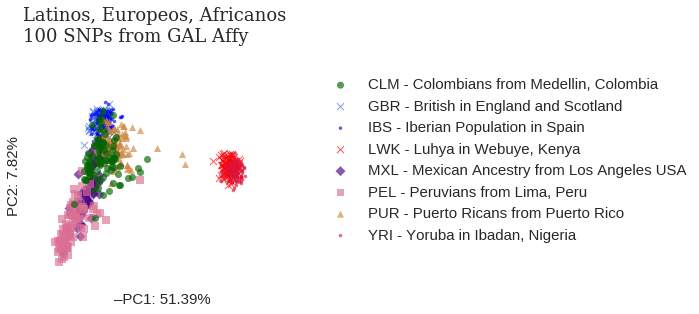

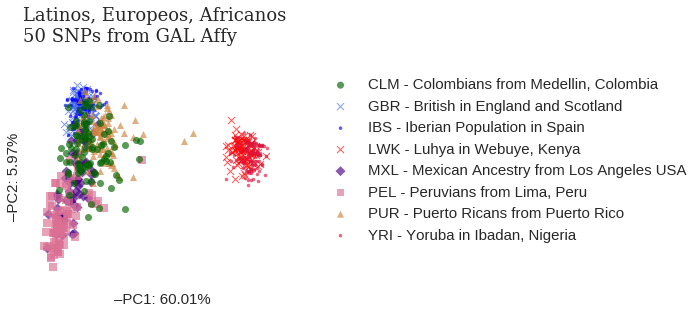

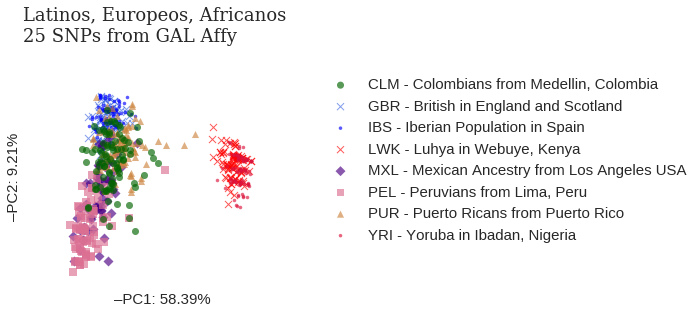

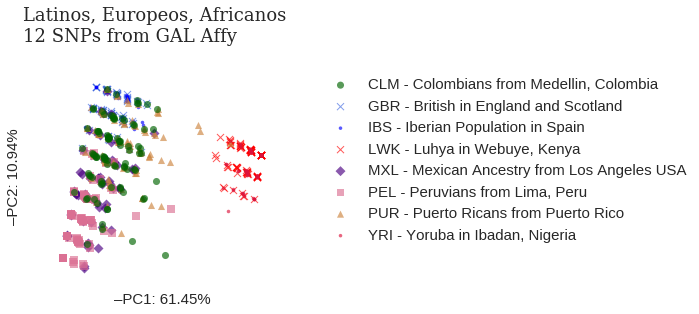

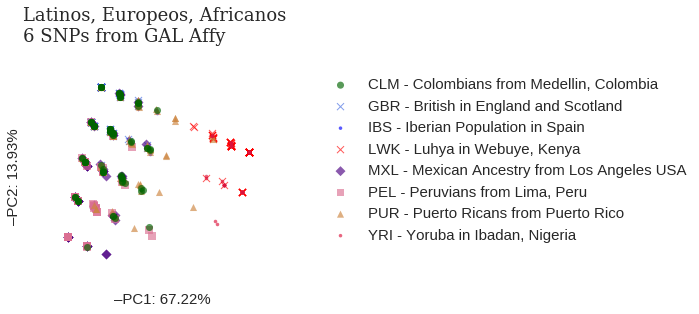

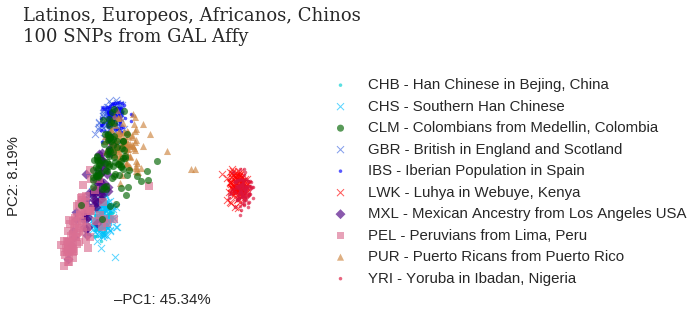

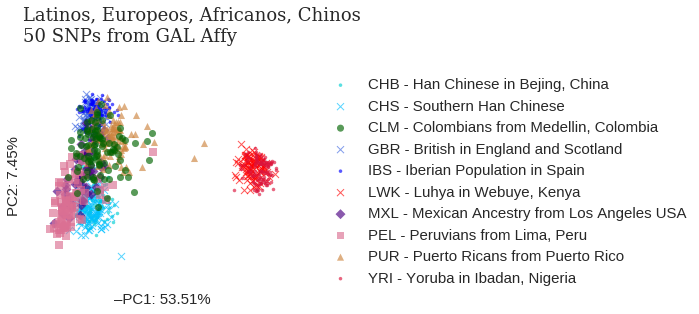

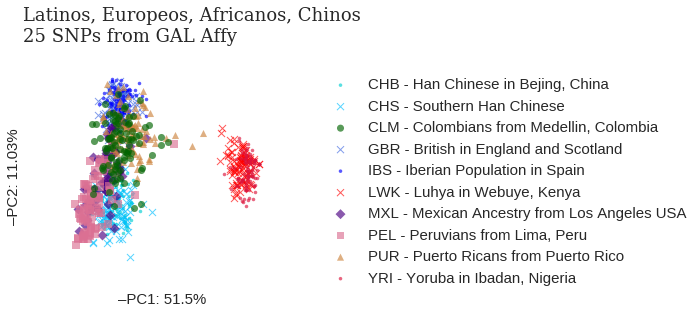

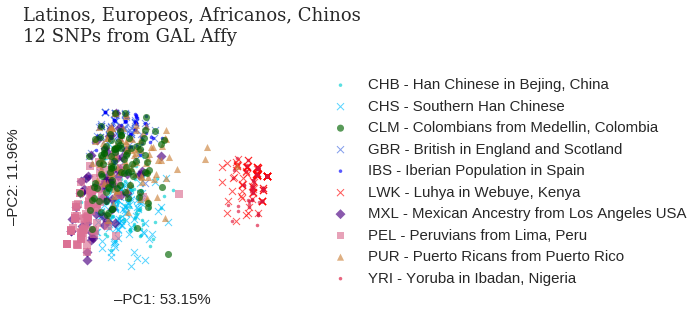

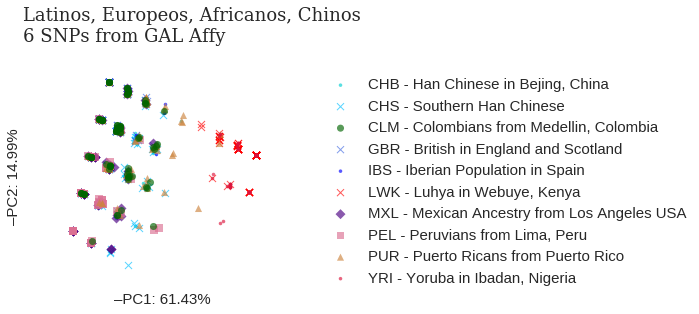

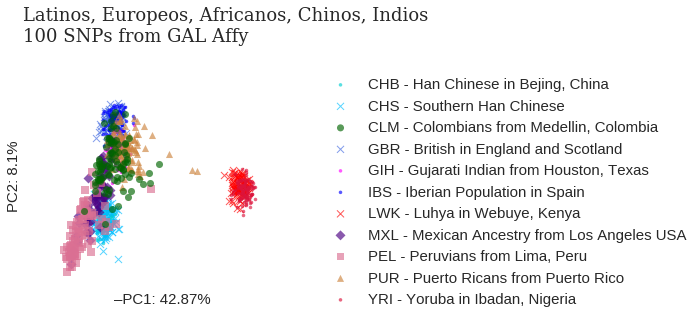

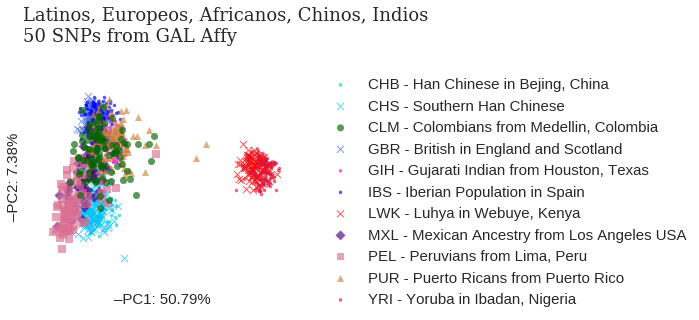

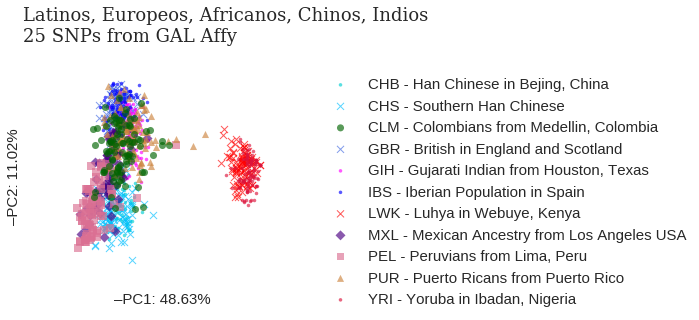

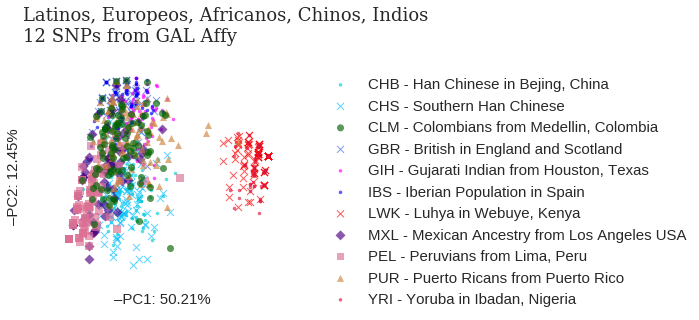

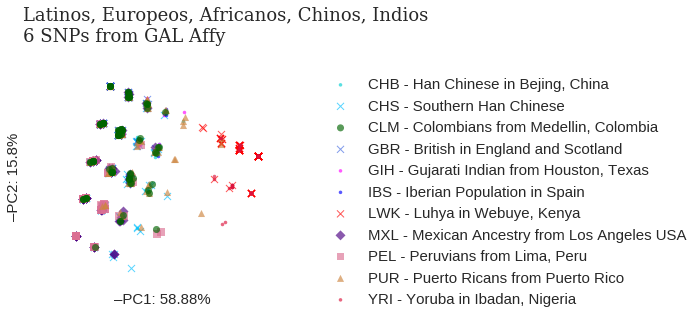

In [4]:
import seaborn as sns

from itertools import product
from components.panel import Panel
from components.dataset import Dataset
from pca.pca_generator import PCAGenerator
from pca.pca_plotter import PCAPlotter


sns.set_context("paper")
sns.set_style("white")

pca_generator = PCAGenerator()
pca_plotter = PCAPlotter()

subpanels = Panel.all_subpanels()
subpanels.sort(key=lambda p: len(p.rs_ids), reverse=True)
    
for norm, dataset, panel in product([True, False], Dataset.all_datasets(), subpanels):
    pretty_name = " ".join(panel.label.split("_"))
    title = dataset.name + "\n" + pretty_name
    filename = dataset.label + "_" + panel.label
    if norm:
        filename += "_normalized"
    genotypes = panel.genotypes_1000G(dataset=dataset)
    pca_df, explained_var = pca_generator.run(genotypes, normalize=norm)
    pca_plotter.plot(pca_df, explained_var, title, filename=filename, plot_size=(5, 4))
    plt.show()

True <Dataset L of 4 populations, 347 samples>
True <Dataset LE of 6 populations, 545 samples>
True <Dataset LEA of 8 populations, 752 samples>
True <Dataset LEAC of 10 populations, 960 samples>
True <Dataset LEACI of 11 populations, 1063 samples>
False <Dataset L of 4 populations, 347 samples>


/home/juan/repos/tesina/pca/pca_generator.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  genotypes.dropna(axis=1, inplace=True)


ValueError: num must be 1 <= num <= 25, not 26

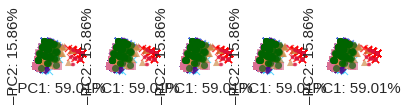

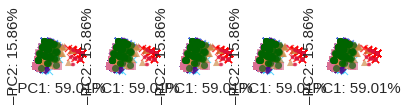

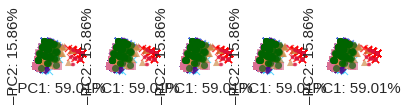

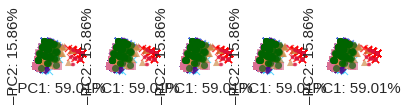

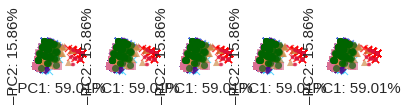

In [12]:
import seaborn as sns

from itertools import product
from components.panel import Panel
from components.dataset import Dataset
from pca.pca_generator import PCAGenerator
from pca.pca_plotter import PCAPlotter


sns.set_context("paper")
sns.set_style("white")

pca_generator = PCAGenerator()
pca_plotter = PCAPlotter()
components_to_compare = ("PC1", "PC2")
  
# Definir número de columnas y filas
# crear ax_ids para popear()
# definir tamaño de la figura total

for norm, dataset in product([True, False], Dataset.all_datasets()):
    print(norm, dataset)
    
    fig = plt.figure()
    for subpanel in Panel.all_subpanels():
    
        pca_df, explained_var = pca_generator.run(genotypes, normalize=norm)
        # ax = fig.add_subplot(5, 5, counter)  #### Ver esto con las definiciones de arriba
        pca_plotter.draw_ax(ax, components_to_compare, pca_df, explained_var)
        
#     pretty_name = " ".join(panel.label.split("_"))
#     title = dataset.name + "\n" + pretty_name
#     filename = dataset.label + "_" + panel.label
#     if norm:
#         filename += "_normalized"
#     genotypes = panel.genotypes_1000G(dataset=dataset)
#     pca_df, explained_var = pca_generator.run(genotypes, normalize=norm)
#     pca_plotter.plot(pca_df, explained_var, title, filename=filename, plot_size=(5, 4))
#     plt.show()


